In [25]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 300)
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import random

In [6]:
multi_img_path = '/nfs/cellprofiler_220527/BBBC021_dataset'
single_img_path = '/nfs/cellprofiler_220527/singcellimg_seg_by_singhcorrectcenter_with_cpfeature/seg_images_by_nuclei_center'
plate = 'Week10_40111'
dapi_name = 'Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3-DBD0C40B78DB.tif'
actin_name = 'Week10_200907_B02_s1_w436D0A3BC-098D-4271-B5AA-361CA0A7DC88.tif'
tubulin_name = 'Week10_200907_B02_s1_w2D492FCE4-15C2-4C66-99A5-E2235A93A3CC.tif'

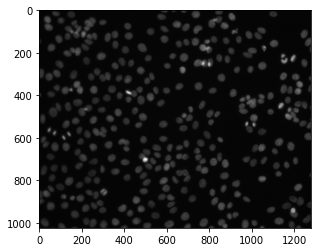

In [44]:
## dapi channel
dapi = np.array(Image.open(os.path.join(multi_img_path, plate, dapi_name)))
plt.imshow(dapi, cmap = 'gray')

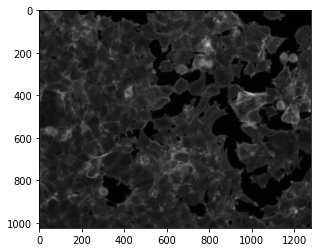

In [45]:
## actin channel
actin = np.array(Image.open(os.path.join(multi_img_path, plate, actin_name)))
plt.imshow(actin, cmap = 'gray')

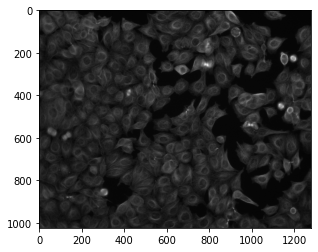

In [46]:
## tubulin channel
tubulin = np.array(Image.open(os.path.join(multi_img_path, plate, tubulin_name)))
plt.imshow(tubulin, cmap = 'gray')

In [36]:
tubulin.max()

12144

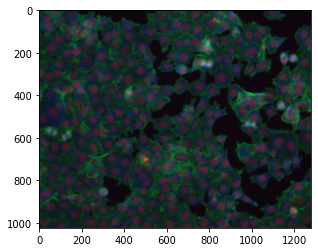

In [37]:
## merge the three channels
merged_image = np.stack([dapi, actin, tubulin], axis=-1)
plt.imshow(merged_image/merged_image.max(axis=(0,1)))

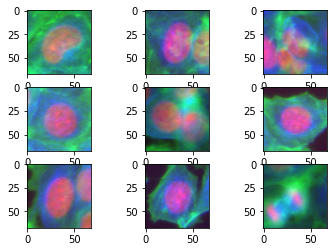

In [49]:
## segmented single cell images
idx = random.sample(range(1, 200), 9)
fig, axs = plt.subplots(3, 3)
for i in range(3):
    for j in range(3):
        single_cell_image = np.load(os.path.join(single_img_path, dapi_name[:-4], dapi_name[:-4]+'_{}.npy'.format(idx[(i-1)*3+j])))
        axs[i, j].imshow(single_cell_image/single_cell_image.max(axis=(0,1)))
# plt.imshow(single_cell_image/single_cell_image.max(axis=(0,1)))

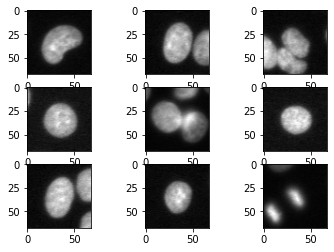

In [50]:
## dapi channel of segmented single cell images
fig, axs = plt.subplots(3, 3)
for i in range(3):
    for j in range(3):
        single_cell_dapi_image = np.load(os.path.join(single_img_path, dapi_name[:-4], dapi_name[:-4]+'_{}.npy'.format(idx[(i-1)*3+j])))[:,:,0]
        axs[i, j].imshow(single_cell_dapi_image, cmap = 'gray')

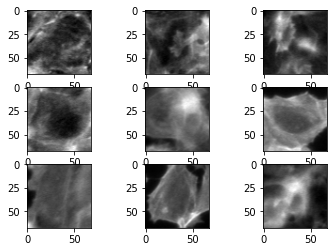

In [51]:
## actin channel of segmented single cell images
fig, axs = plt.subplots(3, 3)
for i in range(3):
    for j in range(3):
        single_cell_actin_image = np.load(os.path.join(single_img_path, dapi_name[:-4], dapi_name[:-4]+'_{}.npy'.format(idx[(i-1)*3+j])))[:,:,1]
        axs[i, j].imshow(single_cell_actin_image, cmap = 'gray')

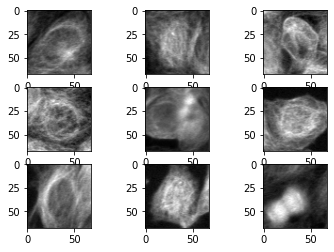

In [52]:
## Tubulin channel of segmented single cell images
fig, axs = plt.subplots(3, 3)
for i in range(3):
    for j in range(3):
        single_cell_tubulin_image = np.load(os.path.join(single_img_path, dapi_name[:-4], dapi_name[:-4]+'_{}.npy'.format(idx[(i-1)*3+j])))[:,:,2]
        axs[i, j].imshow(single_cell_tubulin_image, cmap = 'gray')